In [1]:
from utils import *
from pycaret.regression import*
from pycaret.datasets import get_data 

In [7]:
# Data
data = pd.read_pickle( get_dataset_file_path('dataset_01') )  
display(data)

,time,rssi_0,rssi_1,distance_0,misalignment_0,distance_1,misalignment_1
0,14.86,141,141,0.249246,23.447520,0.248873,30.897335
1,14.94,141,141,0.249246,23.447520,0.248873,30.897335
2,15.01,141,141,0.249246,23.447520,0.248873,30.897335
3,15.09,142,141,0.249246,23.447520,0.248873,30.897335
4,15.16,142,141,0.249246,23.447520,0.248873,30.897335
...,...,...,...,...,...,...,...
847,29.48,140,141,0.370223,7.376238,0.353979,13.548468
848,29.56,141,141,0.368754,7.385186,0.351703,14.399172
849,29.63,141,141,0.365772,7.446653,0.348018,16.437484
850,29.71,141,141,0.364305,7.674508,0.346718,17.693809


In [60]:
target ='misalignment_0'

regressor = setup(data, 
                  target = target, 
                  ignore_features = set(data.columns) - set([target]) - set(data.filter(regex='rssi').columns),
                  normalize = True)   

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4635
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(852, 7)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [61]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.236300,21.659900,4.632200,0.601600,0.323300,0.298400
1,Random Forest,2.990800,21.875800,4.658900,0.595800,0.318100,0.277200
2,Extreme Gradient Boosting,3.372600,22.433700,4.724600,0.594900,0.334400,0.317700
3,CatBoost Regressor,3.092600,22.253000,4.701300,0.592000,0.322600,0.284500
4,Gradient Boosting Regressor,3.362700,22.597700,4.740400,0.591000,0.332400,0.313900
5,Extra Trees Regressor,2.988700,22.633800,4.740800,0.585700,0.323300,0.274200
6,K Neighbors Regressor,3.103700,22.281800,4.701200,0.579900,0.328400,0.285900
7,Decision Tree,2.980000,23.238600,4.803600,0.574600,0.327400,0.273500
8,AdaBoost Regressor,4.421500,30.401800,5.490200,0.467700,0.411900,0.455800
9,Support Vector Machine,5.080000,46.094000,6.729400,0.225000,0.441000,0.452700


In [63]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0454,22.1212,4.7033,0.2226,0.3155,0.2729
1,3.3017,25.6372,5.0633,0.6153,0.3138,0.2661
2,2.5327,16.5480,4.0679,0.7016,0.3111,0.2734
3,3.4571,22.5583,4.7496,0.6712,0.3030,0.2811
4,3.0923,24.5707,4.9569,0.4060,0.4105,0.4291
5,3.2015,27.7435,5.2672,0.4329,0.3650,0.3277
6,3.0324,21.9151,4.6814,0.7493,0.3243,0.2676
7,2.8064,15.0441,3.8787,0.7647,0.2687,0.2401
8,2.5548,19.1627,4.3775,0.6476,0.2862,0.2133
9,2.8835,23.4573,4.8433,0.7467,0.2824,0.2011


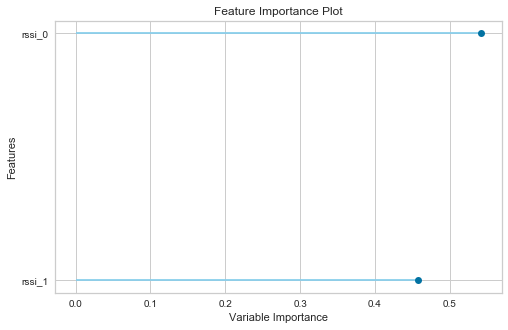

In [67]:
plot_model(model, plot='feature')

In [66]:
# evaluate_model(model)